In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from scipy import stats
import os


In [2]:
def load_data(file_name, branches, process,entrystop=None,):

    root_file = uproot.open(file_name)
    df = root_file['tagsDumper/trees/'+process].pandas.df(branches, entrystop=entrystop).dropna()
    print("Entries in ntuple:")
    print(len(df))
    return df

In [7]:
process_NLO = 'GluGluToHHTo2B2G_TuneCP5_13TeV_powheg_NLO_pythia8_13TeV_DoubleHTag_0'
file_NLO = '/t3home/micheli/flashgg_20190226/CMSSW_9_4_9/src/flashgg/production2017_NLO/output_GluGluToHHTo2B2G_TuneCP5_13TeV-powheg-NLO-pythia8.root'
features = ['diHiggs_pt','diHiggs_mass','genMhh','MX','dijet_pt','dijet_eta','diphoton_pt','diphoton_eta','weight',
            'CMS_hgg_mass','leadingJet_DeepCSV','subleadingJet_DeepCSV',
            'absCosThetaStar_CS','absCosTheta_bb','absCosTheta_gg','customLeadingPhotonIDMVA',
            'customSubLeadingPhotonIDMVA','leadingPhotonSigOverE','subleadingPhotonSigOverE',
            'sigmaMOverM','leadingPhoton_pt','leadingPhoton_eta',
            'subleadingPhoton_pt','subleadingPhoton_eta',
            'leadingJet_pt','leadingJet_eta','subleadingJet_eta','subleadingJet_pt']
tmp = file_NLO.split('/')
out_dir = tmp[-1].replace('.root','')
df_NLO = load_data(file_NLO, features, process_NLO)
features += ['benchmark_reweight_SM']
#process_LO = 'GluGluToHHTo2B2G_node_SM_13TeV_madgraph_13TeV_DoubleHTag_0'
#file_LO = '/t3home/micheli/flashgg_20190226/CMSSW_9_4_9/src/flashgg/production2017_LO/output_GluGluToHHTo2B2G_node_SM_13TeV-madgraph.root'
process_LO = 'GluGluToHHTo2B2G_nodesPlusSM_13TeV_madgraph_13TeV_DoubleHTag_0'
file_LO = '/work/nchernya/HHbbgg_ETH_devel/root_files/ntuples_2017_20191303_appliedMVA/output_GluGluToHHTo2B2G_nodesPlusSM_13TeV-madgraph.root'
df_LO=load_data(file_LO,features,process_LO)
print out_dir

Entries in ntuple:
7088
Entries in ntuple:
890784
output_GluGluToHHTo2B2G_TuneCP5_13TeV-powheg-NLO-pythia8


diHiggs_pt
reducing binning


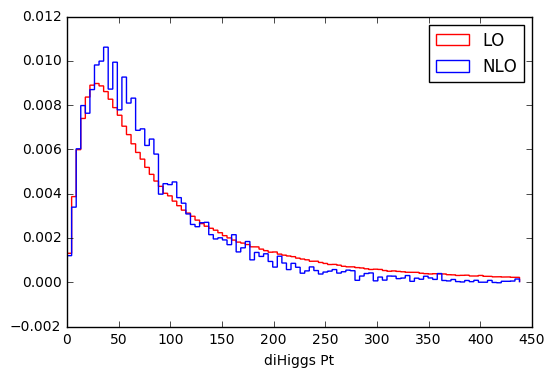

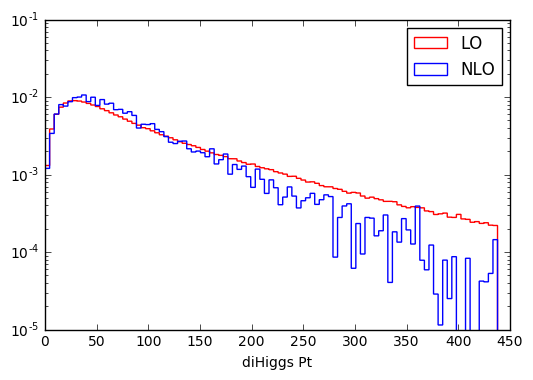

diHiggs_mass
reducing binning


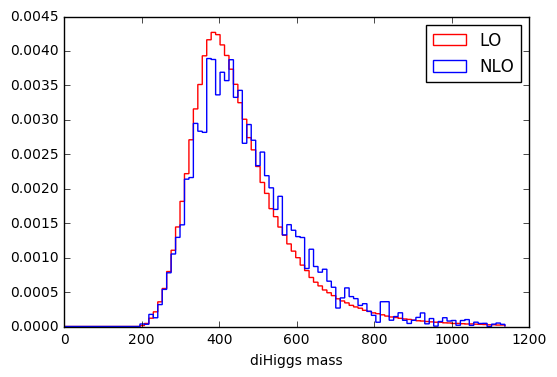

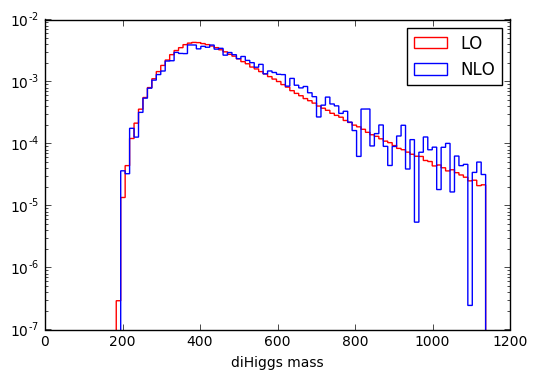

genMhh
reducing binning


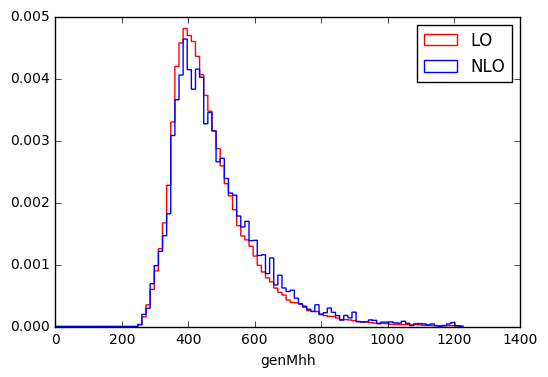

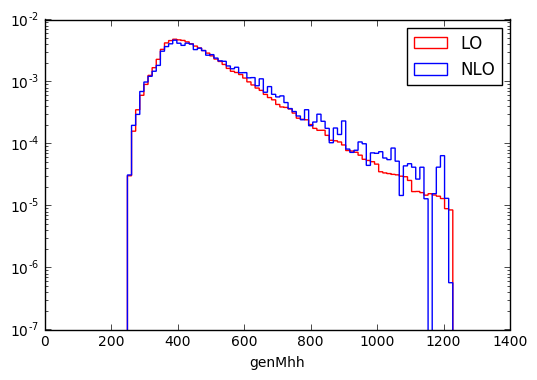

MX
reducing binning


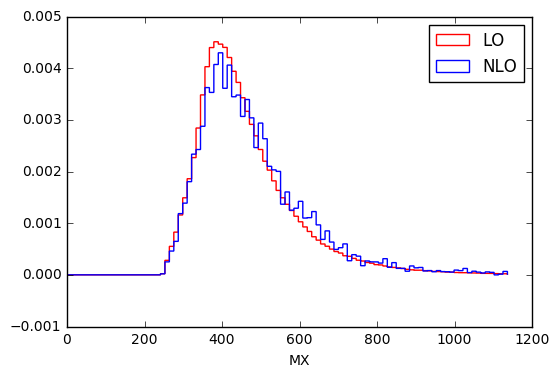

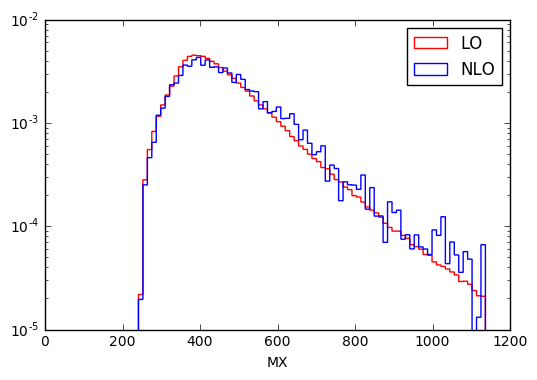

dijet_pt
reducing binning


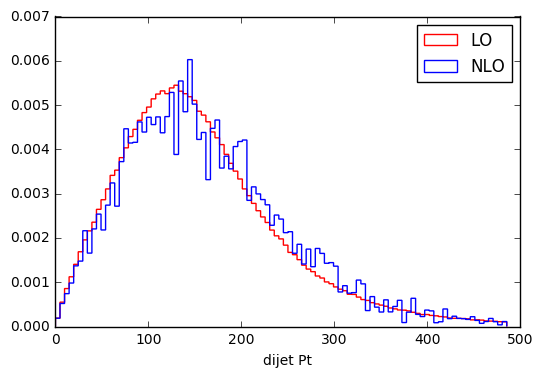

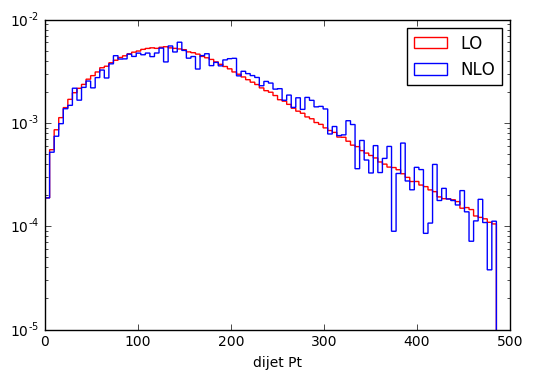

dijet_eta


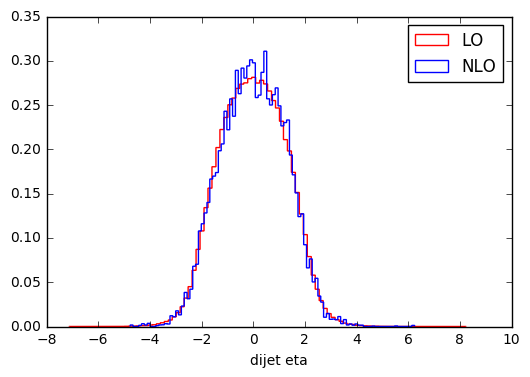

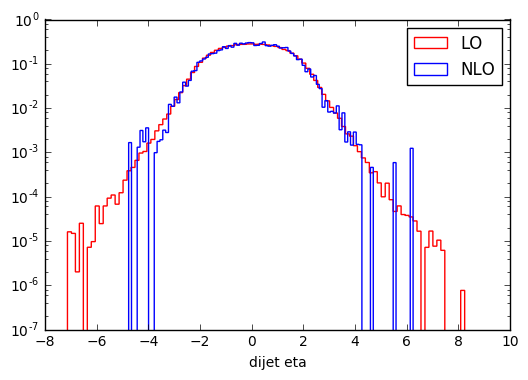

diphoton_pt
reducing binning


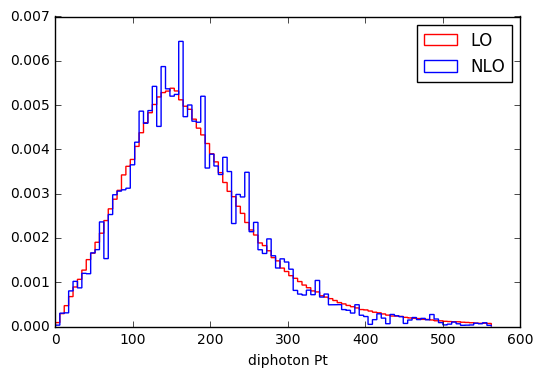

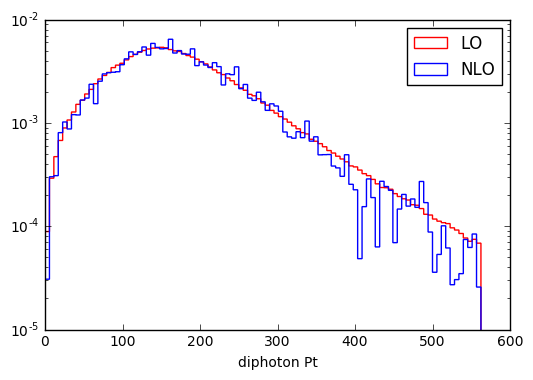

diphoton_eta


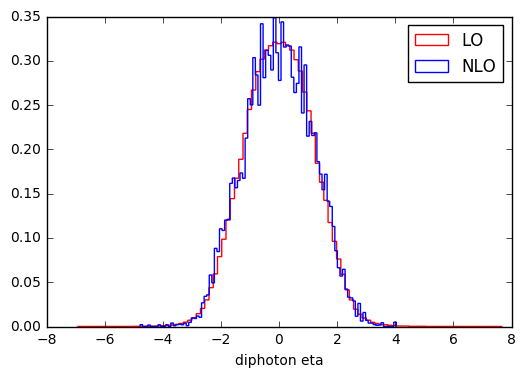

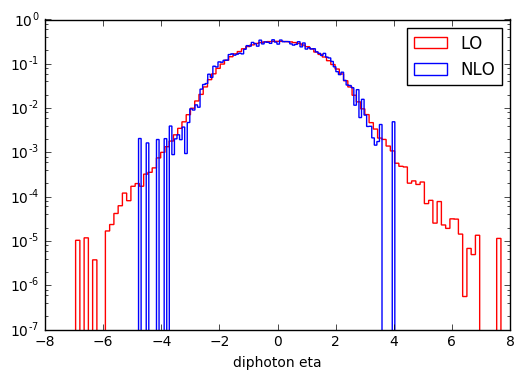

CMS_hgg_mass


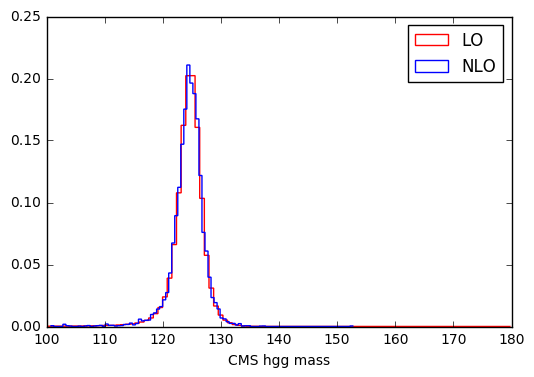

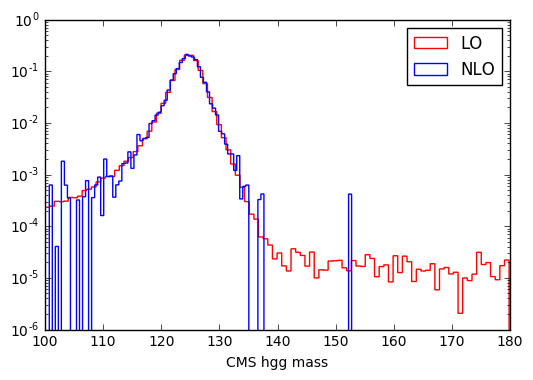

leadingJet_DeepCSV


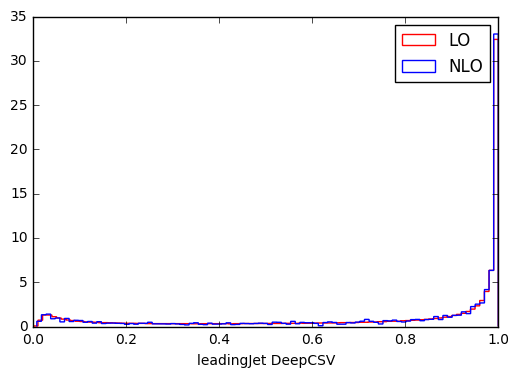

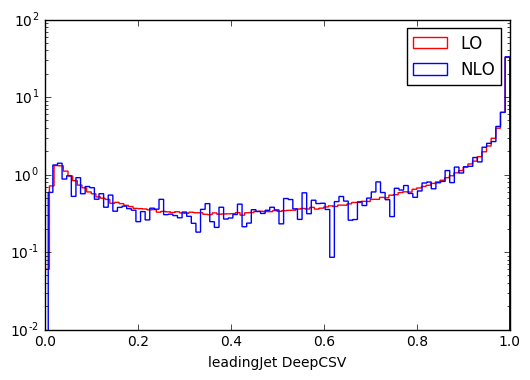

subleadingJet_DeepCSV


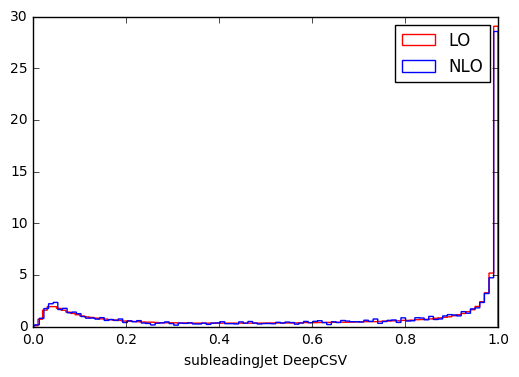

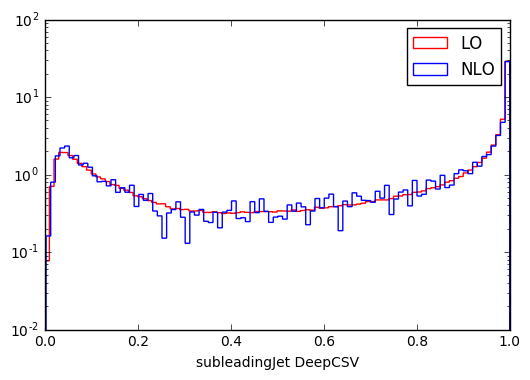

absCosThetaStar_CS


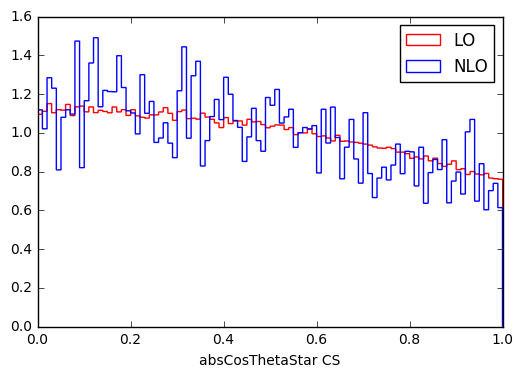

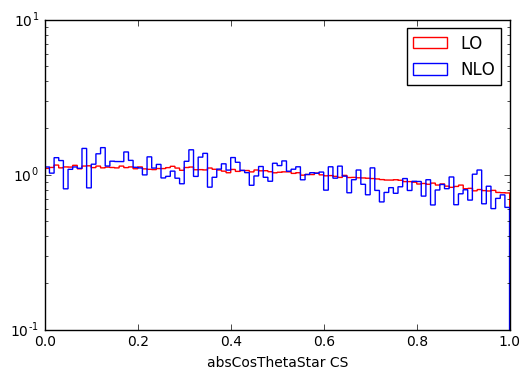

absCosTheta_bb


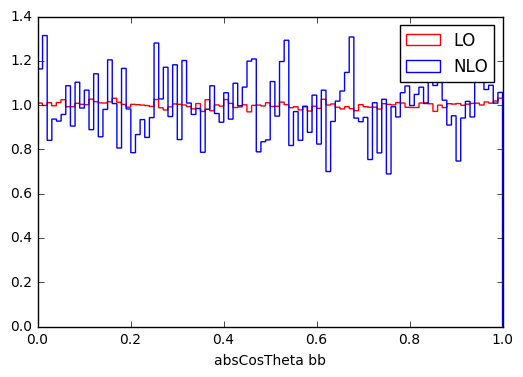

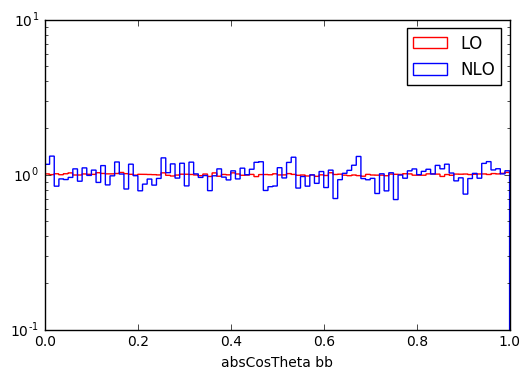

absCosTheta_gg


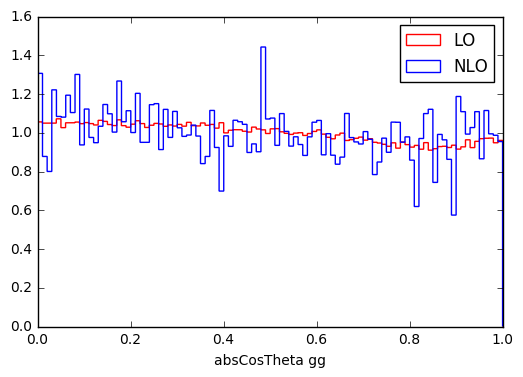

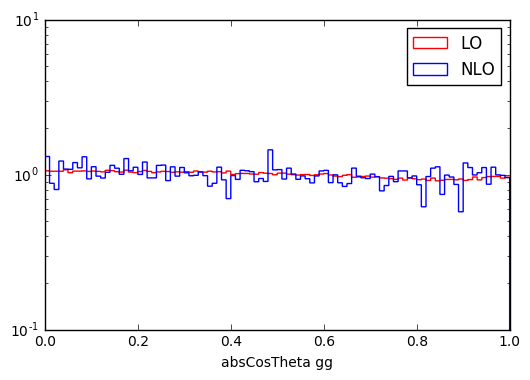

customLeadingPhotonIDMVA
reducing binning


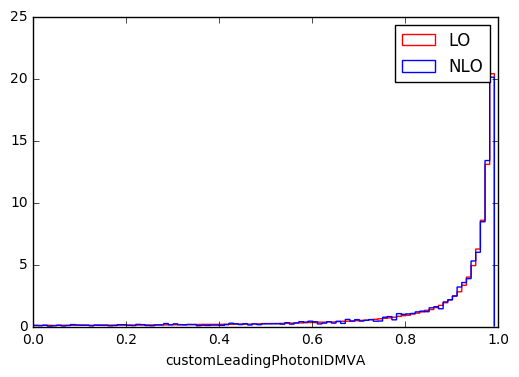

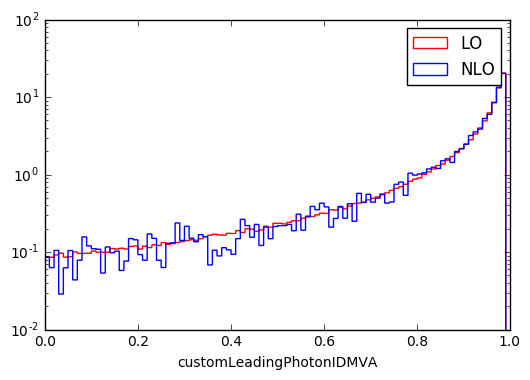

customSubLeadingPhotonIDMVA
reducing binning


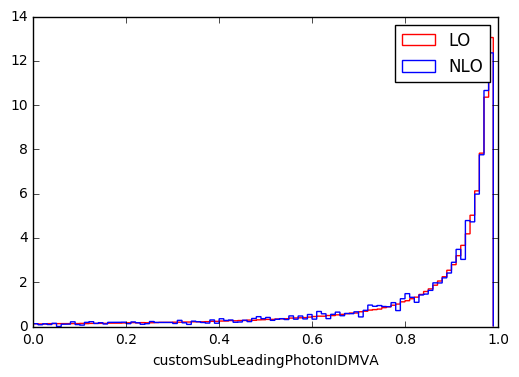

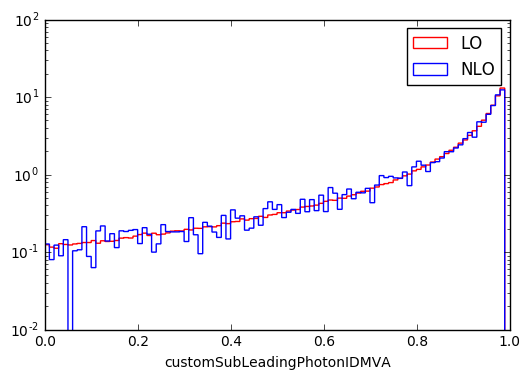

leadingPhotonSigOverE
reducing binning


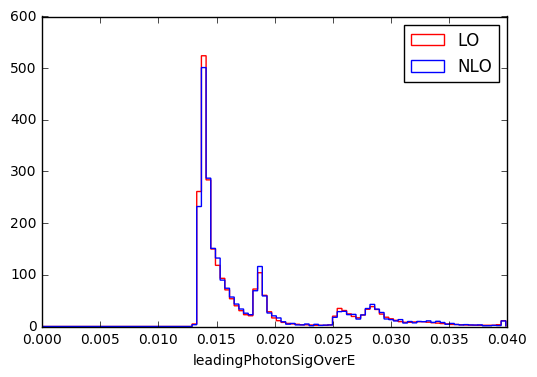

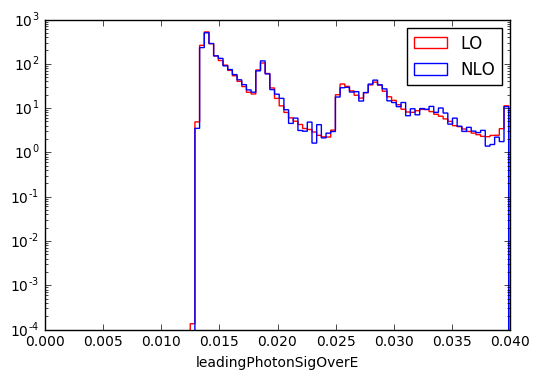

subleadingPhotonSigOverE
reducing binning


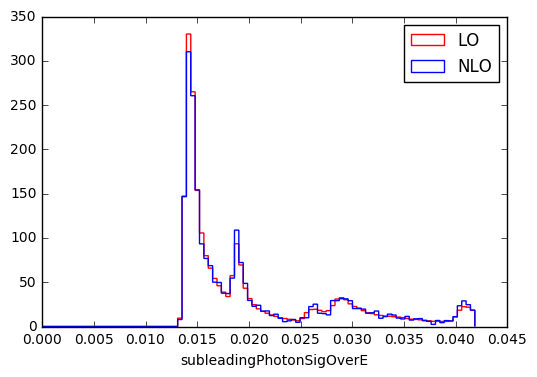

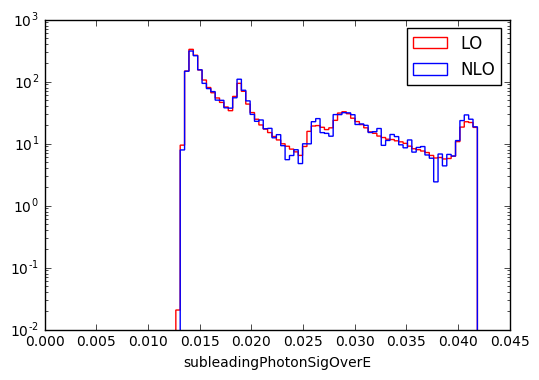

sigmaMOverM
reducing binning


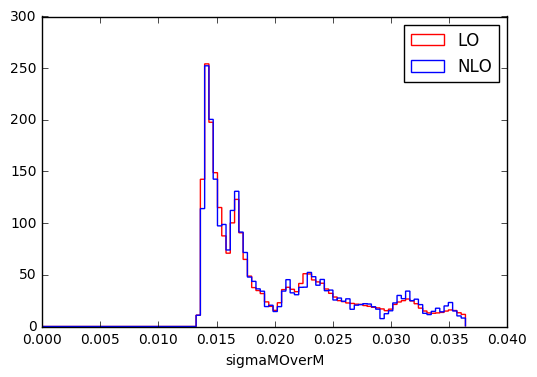

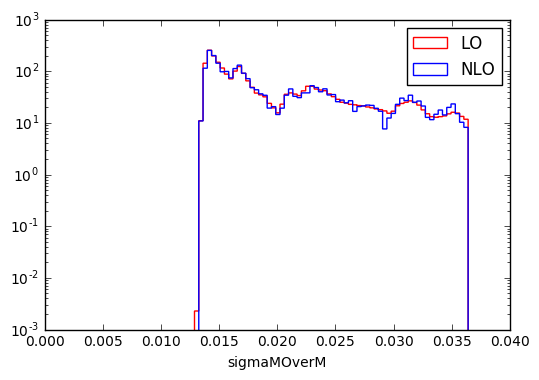

leadingPhoton_pt
reducing binning


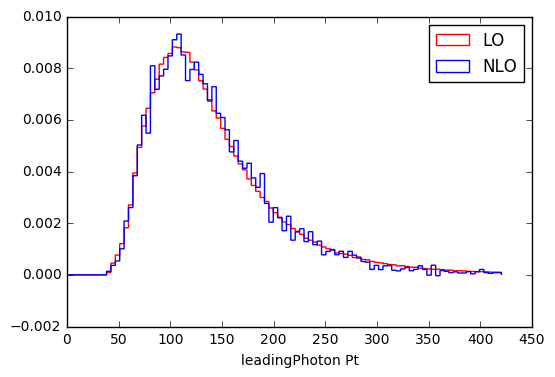

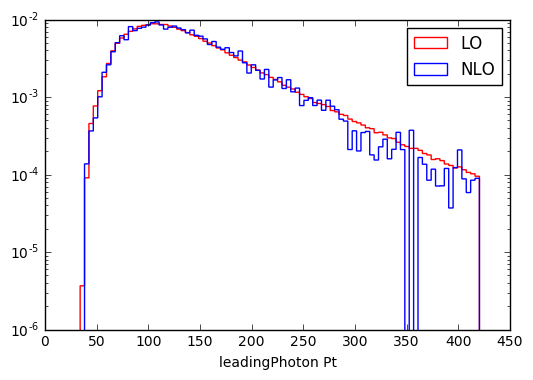

leadingPhoton_eta


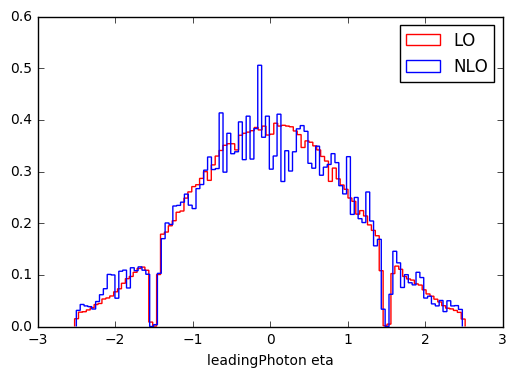

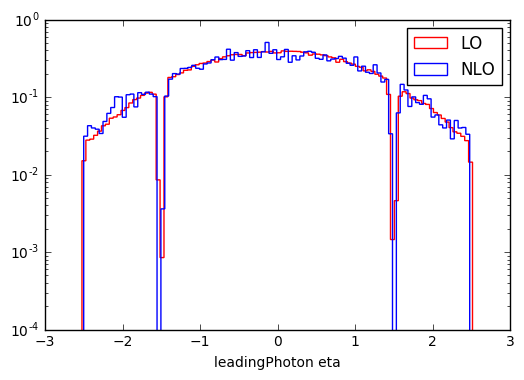

subleadingPhoton_pt
reducing binning


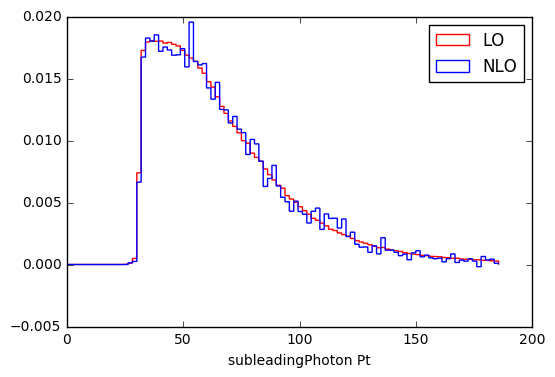

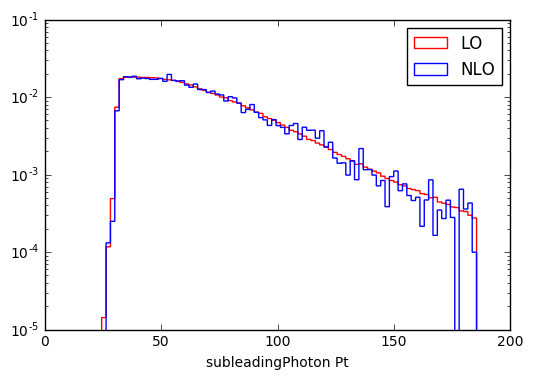

subleadingPhoton_eta


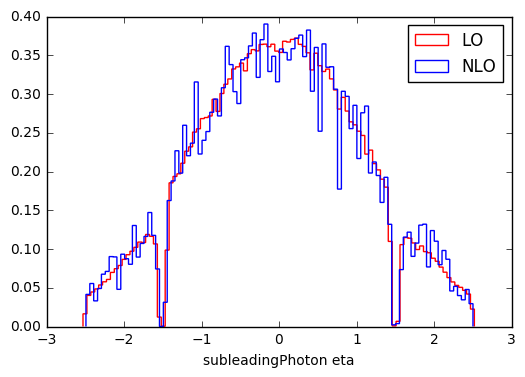

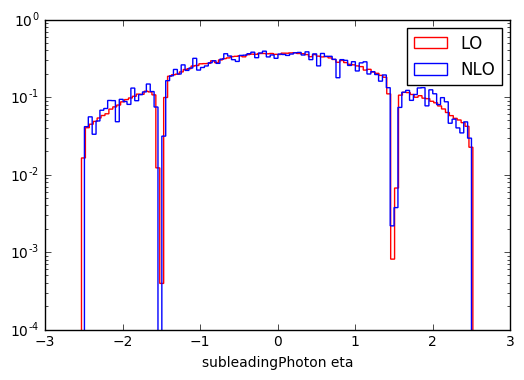

leadingJet_pt
reducing binning


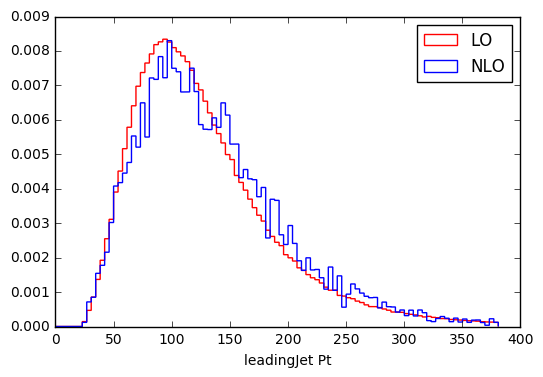

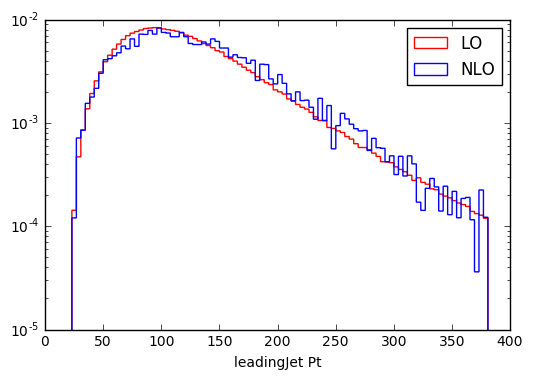

leadingJet_eta


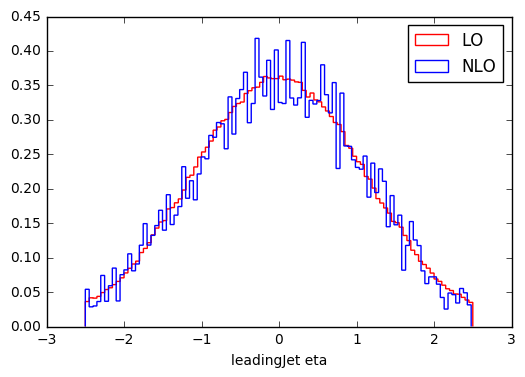

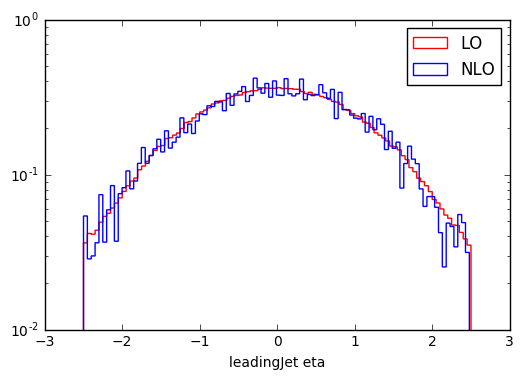

subleadingJet_eta


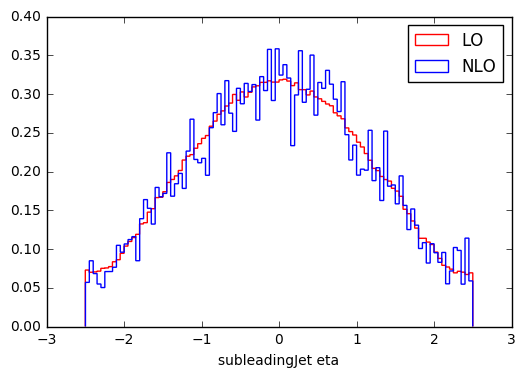

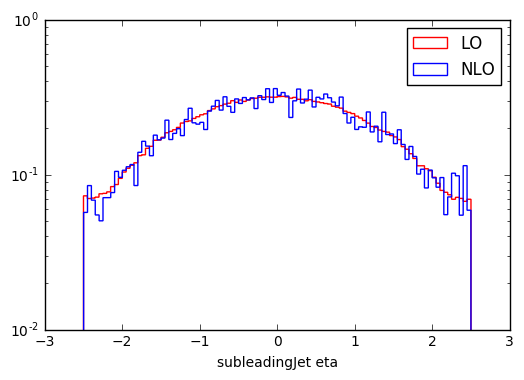

subleadingJet_pt
reducing binning


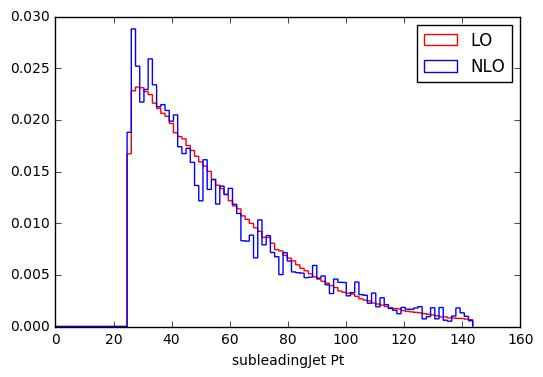

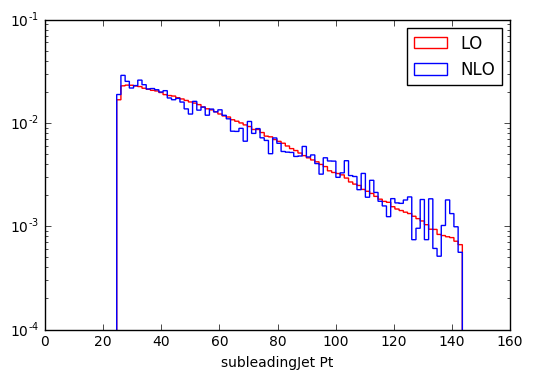

In [8]:
#plotting routine
numbins=100
if not os.path.exists(out_dir):
    os.mkdir(out_dir)
for feat in features:
    if 'weight' in feat: 
        continue
    print feat 
    #set the same range
    if ('pt' in feat or 'mass' in feat or 'M' in feat or 'SigOverE' in feat) and (feat not in 'CMS_hgg_mass'):
        print "reducing binning"
        nbins = np.linspace(0.0, np.quantile(df_LO[feat],0.95) , numbins)
    else:
        nbins = numbins
    val_of_bins_x1, edges_of_bins_x1, patches_x1  = plt.hist(df_LO[feat],label='LO',histtype='step',bins=nbins,color='red',normed='True',weights=df_LO['weight']*df_LO['benchmark_reweight_SM'])
    val_of_bins_x2, edges_of_bins_x2, patches_x2 = plt.hist(df_NLO[feat],label='NLO',histtype='step',bins=nbins,color='blue',normed='True',weights=df_NLO['weight'])
    plt.legend(loc="upper right")

    plt.xlabel(feat.replace('_',' ').replace('pt','Pt'))
    plt.savefig(os.path.join(out_dir, str(feat)+".png"))
    plt.show()
    
    plt.yscale('log')
    val_of_bins_x1, edges_of_bins_x1, patches_x1  = plt.hist(df_LO[feat],label='LO',histtype='step',bins=nbins,color='red',normed='True',weights=df_LO['weight']*df_LO['benchmark_reweight_SM'])
    val_of_bins_x2, edges_of_bins_x2, patches_x2 = plt.hist(df_NLO[feat],label='NLO',histtype='step',bins=nbins,color='blue',normed='True',weights=df_NLO['weight'])
    plt.xlabel(feat.replace('_',' ').replace('pt','Pt'))
    plt.savefig(os.path.join(out_dir, str(feat)+"_log.png"))
    plt.legend(loc="upper right")

    plt.show()
    plt.yscale('linear')


In [21]:
print("fraction of negative weights:"+str(np.count_nonzero(df_NLO["weight"]<0)/float(len(df_NLO))*100)+"%")

fraction of negative weights:5.20598194131%
